## Setup

In [ ]:
!pip -q install segyio
!pip -q install pylops


!git clone https://github.com/yohanesnuwara/geopysics
!git clone https://github.com/yohanesnuwara/d2geo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 7.0 MB/s eta 0:00:00
Cloning into 'geopysics'...
remote: Enumerating objects: 648, done.
remote: Counting objects: 100% (411/411), done.
remote: Compressing objects: 100% (203/203), done.
remote: Total 648 (delta 253), reused 347 (delta 206), pack-reused 237 (from 1)
Receiving objects: 100% (648/648), 49.87 MiB | 20.83 MiB/s, done.
Resolving deltas: 100% (374/374), done.
Cloning into 'd2geo'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 116 (delta 39), reused 29 (delta 29), pack-reused 66 (from 1)
Receiving objects: 100% (116/116), 49.77 KiB | 784.00 KiB/s, done.
Resolving deltas: 100% (56/56), done.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import segyio, pylops
import sys

/usr/local/lib/python3.11/dist-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [ ]:
# sys.path.append('/content/computational-geophysics')
# # sys.path.append('/content/d2geo/attributes')

In [ ]:
# # Seistool consists of function to show seismic section
# from seismic.seistool import *

# # Seis_attribute to calculate attributes
# from seismic.seis_attribute import *

In [ ]:
sys.path.append('/content/geopysics/seismic')
sys.path.append('/content/geopysics/seismic/attributes')

In [ ]:
from seistool import *
from seis_attribute import *

In [ ]:
# Get access to data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Open Segy and Parse

In [ ]:
# Takes 3-5 minute to load data
filename = '/content/drive/MyDrive/EDVANTAGE/Python Geophysics Course/DATA/DAY 3/ST0202R08_PZ_PSDM_FULL_OFFSET_DEPTH.MIG_FIN.POST_STACK.3D.JS-017534.segy'

# Read Segy
cube = openSegy3D(filename)

Successfully read 

Inline range from 9985 to 10369
Crossline range from 1932 to 2536
TWT from 0.0 to 4500.0
Sample rate: 5.0 ms
Survey rotation: 4.96 deg


In [ ]:
help(openSegy3D)

Help on function openSegy3D in module seistool:

openSegy3D(filename, iline=189, xline=193)
    Open 3D seismic volume in SEGY or SGY format 
    
    NOTE: Default byte location iline=189, xline=193
          If it returns "openSegy3D cannot read the data", change iline and xline
          Usually, specifying iline=5, xline=21 works



In [ ]:
# Parse the header
header = parseHeader(filename)

header

TRACE_SEQUENCE_LINE  TRACE_SEQUENCE_FILE  FieldRecord  TraceNumber  \
1                         1                    1            0            0   
2                         2                    2            0            0   
3                         3                    3            0            0   
4                         4                    4            0            0   
5                         5                    5            0            0   
...                     ...                  ...          ...          ...   
232921                  601               232921            0            0   
232922                  602               232922            0            0   
232923                  603               232923            0            0   
232924                  604               232924            0            0   
232925                  605               232925            0            0   

        EnergySourcePoint   CDP  CDP_TRACE  TraceIdentificationCode  \
1                    1932  1932          1                        1   
2                    1933  1933          2                        1   
3                    1934  1934          3                        1   
4                    1935  1935          4                        1   
5                    1936  1936          5                        1   
...                   ...   ...        ...                      ...   
232921               2532  2532        601                        1   
232922               2533  2533        602                        1   
232923               2534  2534        603                        1   
232924               2535  2535        604                        1   
232925               2536  2536        605                        1   

        NSummedTraces  NStackedTraces  ...  TraceIdentifier  \
1                   1              28  ...                0   
2                   1              29  ...                0   
3                   1              30  ...                0   
4                   1              30  ...                0   
5                   1              30  ...                0   
...               ...             ...  ...              ...   
232921              1              36  ...                0   
232922              1              36  ...                0   
232923              1              36  ...                0   
232924              1              35  ...                0   
232925              1              34  ...                0   

        ScalarTraceHeader  SourceType  SourceEnergyDirectionMantissa  \
1                       0           0                              0   
2                       0           0                              0   
3                       0           0                              0   
4                       0           0                              0   
5                       0           0                              0   
...                   ...         ...                            ...   
232921                  0           0                              0   
232922                  0           0                              0   
232923                  0           0                              0   
232924                  0           0                              0   
232925                  0           0                              0   

        SourceEnergyDirectionExponent  SourceMeasurementMantissa  \
1                                   0                          0   
2                                   0                          0   
3                                   0                          0   
4                                   0                          0   
5                                   0                          0   
...                               ...                        ...   
232921                              0                          0   
232922                              0               

In [ ]:
header.columns

Index(['TRACE_SEQUENCE_LINE', 'TRACE_SEQUENCE_FILE', 'FieldRecord',
       'TraceNumber', 'EnergySourcePoint', 'CDP', 'CDP_TRACE',
       'TraceIdentificationCode', 'NSummedTraces', 'NStackedTraces', 'DataUse',
       'offset', 'ReceiverGroupElevation', 'SourceSurfaceElevation',
       'SourceDepth', 'ReceiverDatumElevation', 'SourceDatumElevation',
       'SourceWaterDepth', 'GroupWaterDepth', 'ElevationScalar',
       'SourceGroupScalar', 'SourceX', 'SourceY', 'GroupX', 'GroupY',
       'CoordinateUnits', 'WeatheringVelocity', 'SubWeatheringVelocity',
       'SourceUpholeTime', 'GroupUpholeTime', 'SourceStaticCorrection',
       'GroupStaticCorrection', 'TotalStaticApplied', 'LagTimeA', 'LagTimeB',
       'DelayRecordingTime', 'MuteTimeStart', 'MuteTimeEND',
       'TRACE_SAMPLE_COUNT', 'TRACE_SAMPLE_INTERVAL', 'GainType',
       'InstrumentGainConstant', 'InstrumentInitialGain', 'Correlated',
       'SweepFrequencyStart', 'SweepFrequencyEnd', 'SweepLength', 'SweepType',
       'Swee

In [ ]:
location = header[['CDP_X', 'CDP_Y']]

location

CDP_X      CDP_Y
1       43872711  647551437
2       43871498  647551739
3       43870285  647552041
4       43869072  647552344
5       43867859  647552646
...          ...        ...
232921  43261097  648198638
232922  43259884  648198940
232923  43258671  648199243
232924  43257458  648199545
232925  43256246  648199848

[232925 rows x 2 columns]

/tmp/ipython-input-2402845049.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', fontsize=15)


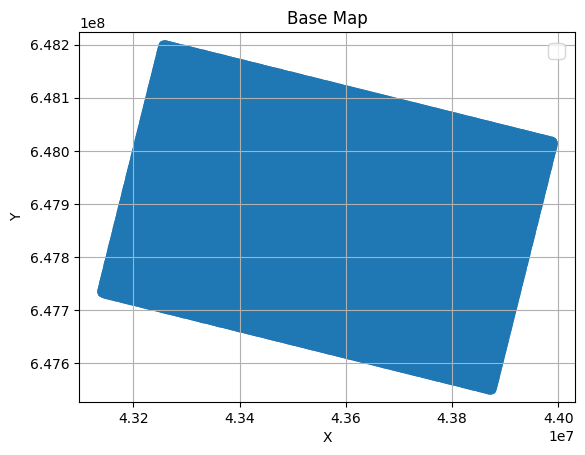

In [ ]:
## Plot basemap
plt.scatter(location.CDP_X, location.CDP_Y)

plt.axis('equal')
plt.title('Base Map')
plt.xlabel('X'); plt.ylabel('Y')
plt.legend(loc='upper right', fontsize=15)
plt.grid()
plt.show()


## Display

In [ ]:
# Unwrap cube information
il, xl, twt = cube.inlines, cube.crosslines, cube.twt
data = cube.data

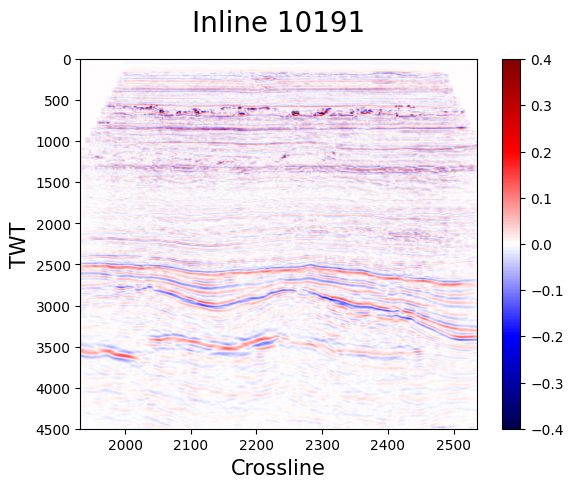

In [ ]:
sliceCube(cube, 'il', inline_loc=10191, display=True,
          cmap='seismic', vmin=-.4, vmax=.4)

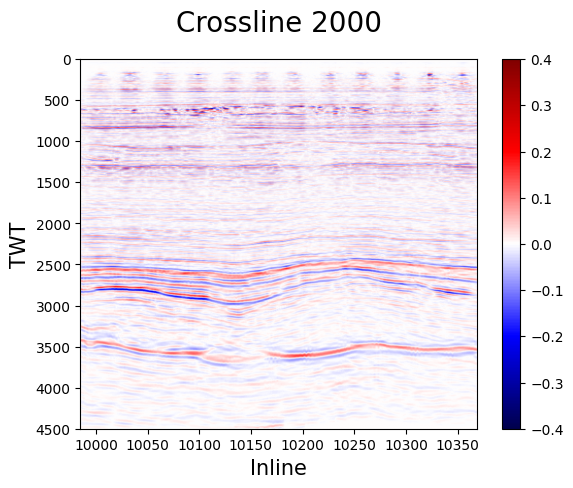

In [ ]:
sliceCube(cube, 'xl', xline_loc=2000, display=True,
          cmap='seismic', vmin=-.4, vmax=.4)

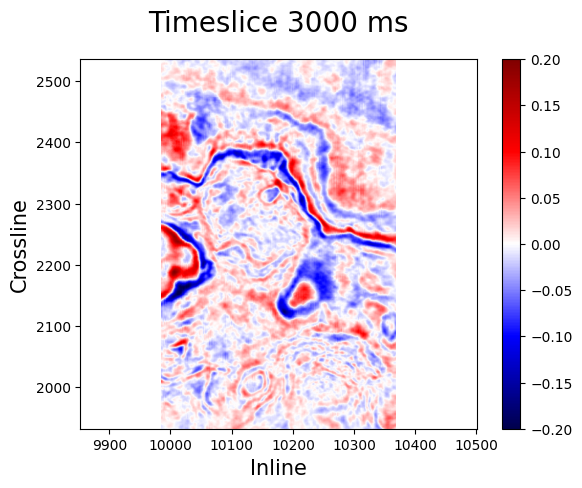

In [ ]:
sliceCube(cube, 'ts', timeslice_loc=3000, display=True,
          cmap='seismic', vmin=-.2, vmax=.2)

In [ ]:
# Interactive display
sliceViewer(cube, 'Volve')

interactive(children=(ToggleButtons(description='Selection', options=('Inline', 'Crossline', 'Timeslice'), val…

## Attribute

In [ ]:
# List of available attributes of CompleTrace class
attributes = ['enve', 'inphase', 'cosphase', 'ampcontrast', 'ampacc',
              'infreq', 'inband', 'domfreq', 'freqcontrast', 'sweet',
              'quality', 'resphase', 'resfreq', 'resamp', 'apolar']

### Envelope

In [ ]:
# INLINE
## If you set display to False, it will return the array
result = sliceAttribute(cube, output='2d', type='il', inline_loc=10191,
                        attribute_class='CompleTrace',
                        attribute_type='enve', display=False)

result

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [8.67407145e-07, 9.71084176e-07, 8.94956923e-07, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.43465922e-07, 8.90436642e-07, 6.81803890e-07, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [1.65516486e-02, 9.26806471e-03, 1.10784533e-02, ...,
         2.55993729e-02, 3.26417368e-02, 2.63255017e-02],
        [3.71568822e-03, 2.28765841e-03, 3.25285228e-03, ...,
         1.46224321e-02, 2.00824890e-02, 1.37539025e-02],
        [3.86438818e-04, 3.81907264e-04, 4.01836679e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]])

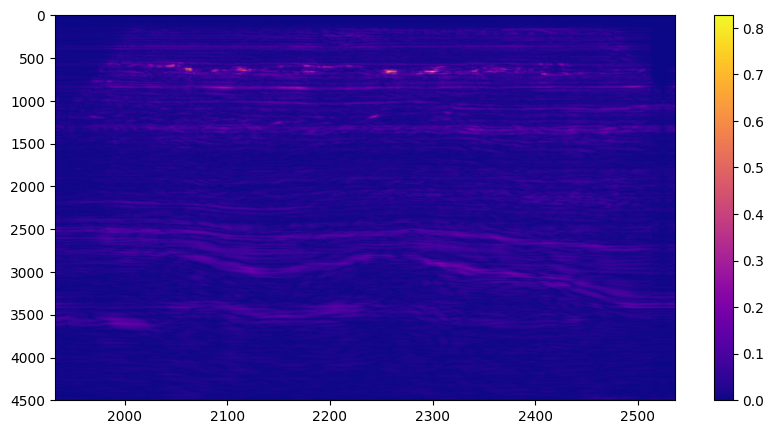

In [ ]:
## If you set display to False, it will return the visualization
sliceAttribute(cube, output='2d', type='il', inline_loc=10191,
                        attribute_class='CompleTrace',
                        attribute_type='enve', display=True)

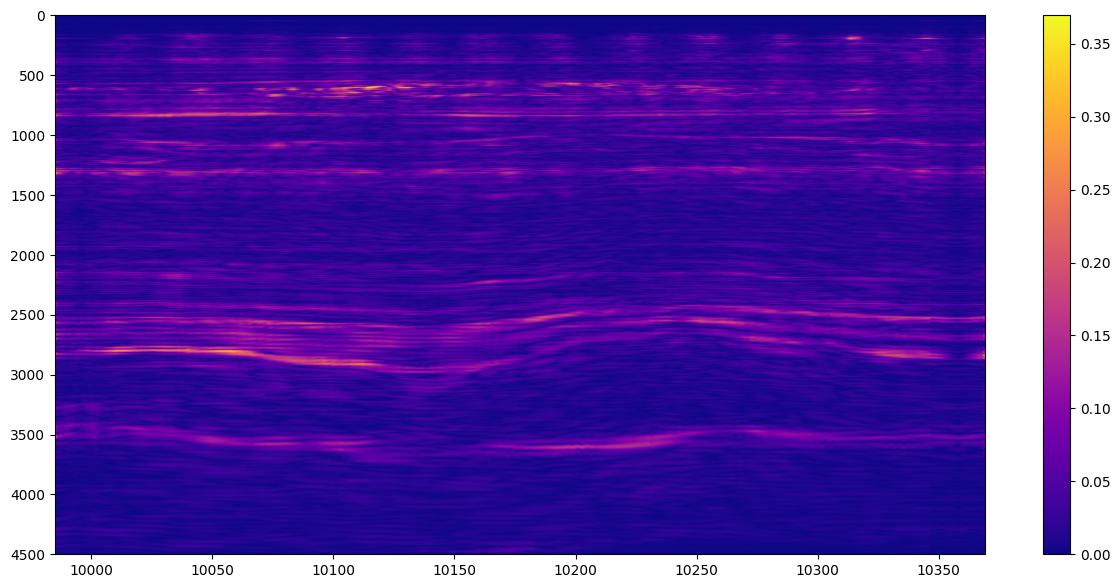

In [ ]:
sliceAttribute(cube, output='2d', type='xl', xline_loc=2000,
               attribute_class='CompleTrace', attribute_type='enve',
               display=True, figsize=(15,7))

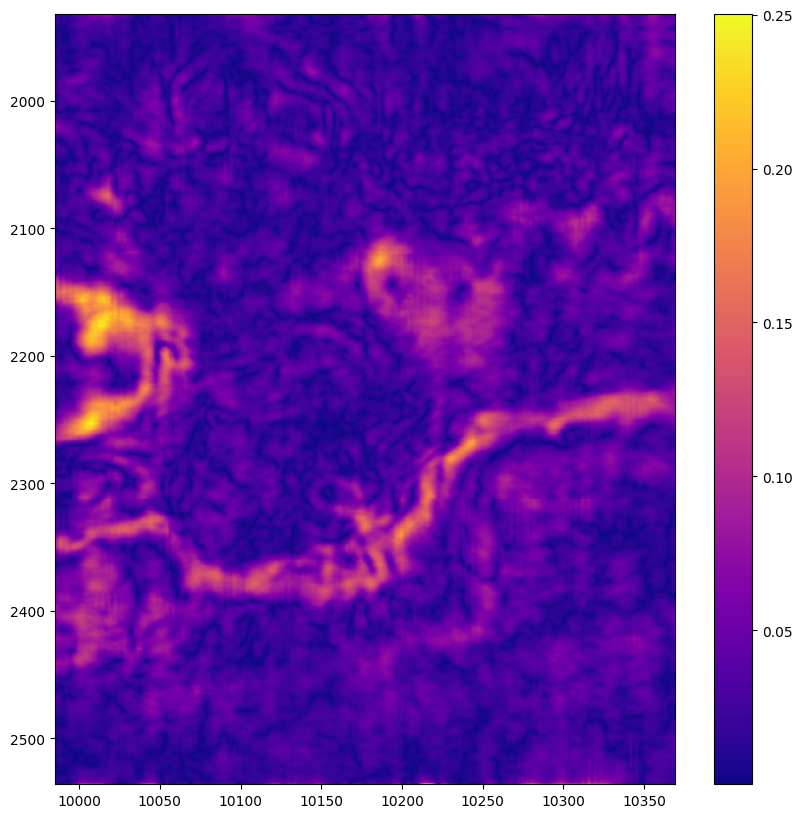

In [ ]:
sliceAttribute(cube, output='2d', type='ts', timeslice_loc=3000,
               attribute_class='CompleTrace', attribute_type='enve',
               display=True, figsize=(10,10))

## Frequency spectrum

Estimating the frequency spectrum of a defined mini-cube. We would like the mini-cube for the first 100 inlines and crosslines, but TWT only from 2400 to 2600 ms.

In [ ]:
# Define the range of il, xl, and twt for the mini cube
mini_range = {"il": (il[0], il[150]), "xl": (xl[0], xl[150]), "twt": (2400, 2600)}

mini_range

{'il': (np.int32(9985), np.int32(10135)),
 'xl': (np.int32(1932), np.int32(2082)),
 'twt': (2400, 2600)}

In [ ]:
help(frequencySpectrum)

Help on function frequencySpectrum in module seistool:

frequencySpectrum(cube, mini_range, dt=0.005, nfft=2048, display=False)
    Frequency Spectrum of a Mini-cube using Fast Fourier Transform
    
    NOTE: This operation can possibly consume lots of RAMs.



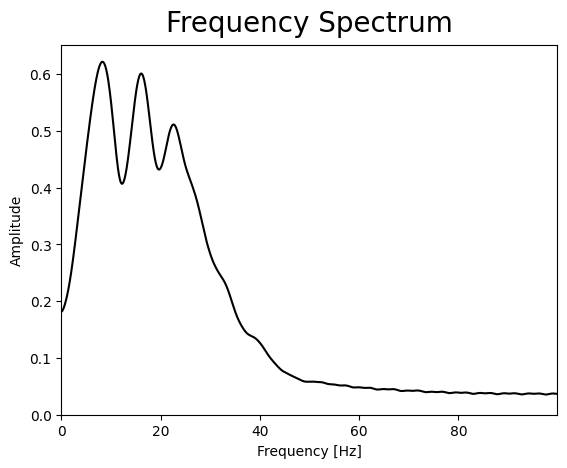

In [ ]:
# Plot frequency spectrum of selected minicube range
frequencySpectrum(cube, mini_range, dt=0.005, nfft=2**11, display=True)


## Post-stack seismic inversion

### Create wavelet

In [ ]:
# Get statistical wavelet of mini-cube
t_wav, wav_est = statisticalWavelet(cube, mini_range, dt=0.005, nfft=2**11, nt_wav=41)

wav_est

array([-1.63664762e-03,  4.73365013e-04,  3.66897578e-03,  6.99488213e-03,
        7.67051568e-03,  2.31347908e-03, -8.11550766e-03, -1.89003516e-02,
       -2.46644206e-02, -2.28419006e-02, -1.61422919e-02, -6.96884282e-03,
        5.09871216e-03,  1.94424931e-02,  3.28142680e-02,  3.95132862e-02,
        3.49562056e-02,  1.98223367e-02, -1.21174424e-04, -1.76867209e-02,
       -2.91439034e-02, -3.56327817e-02, -3.91131043e-02, -3.97873931e-02,
       -3.85756828e-02, -4.00925167e-02, -4.80480902e-02, -5.76591901e-02,
       -5.98705821e-02, -5.22650927e-02, -4.07182537e-02, -3.11658811e-02,
       -2.89364737e-02, -4.31742556e-02, -8.34571421e-02, -1.35444820e-01,
       -1.36764124e-01, -9.56959836e-03,  2.69968122e-01,  6.22797489e-01,
        1.00000000e+00,  6.22797489e-01,  2.69968122e-01, -9.56959836e-03,
       -1.36764124e-01, -1.35444820e-01, -8.34571421e-02, -4.31742556e-02,
       -2.89364737e-02, -3.11658811e-02, -4.07182537e-02, -5.22650927e-02,
       -5.98705821e-02, -

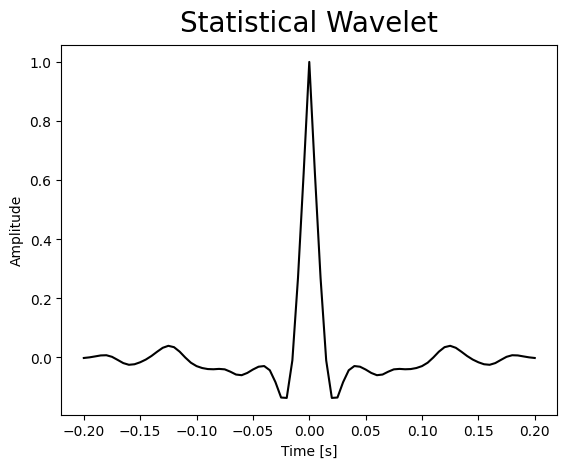

In [ ]:
# Display the statistical wavelet of mini-cube (pass display=True)
statisticalWavelet(cube, mini_range, dt=0.005, nfft=2**11, nt_wav=41, display=True)

In [ ]:
# Slice cube into inline 10191
type = 'il'
data = sliceCube(cube, type, inline_loc=10171)

data

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -1.1734506e-03, -9.1997930e-04, -5.7421182e-04],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -7.7839522e-04, -6.8871002e-04, -4.2766496e-04],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -1.3553469e-04, -7.5932097e-05,  9.7972850e-05]], dtype=float32)

### Relative impedance

In [ ]:
# Make starting AI model as zeros
m0 = np.zeros_like(data)

In [ ]:
# Invert for relative impedance and calculate residuals
m_rel, r_rel = slicePostStackInversion(data, type, wav_est, m0, explicit=True,
                                       epsI=1e-3, simultaneous=False)


/usr/local/lib/python3.11/dist-packages/pylops/utils/signalprocessing.py:46: FutureWarning: A new implementation of convmtx is provided in v2.2.0 to match MATLAB's convmtx method as stated in the docstring. The implementation of convmtx provided prior to v2.2.0 was instead not consistent with the documentation. Users are highly encouraged to modify their codes accordingly.
  warnings.warn(


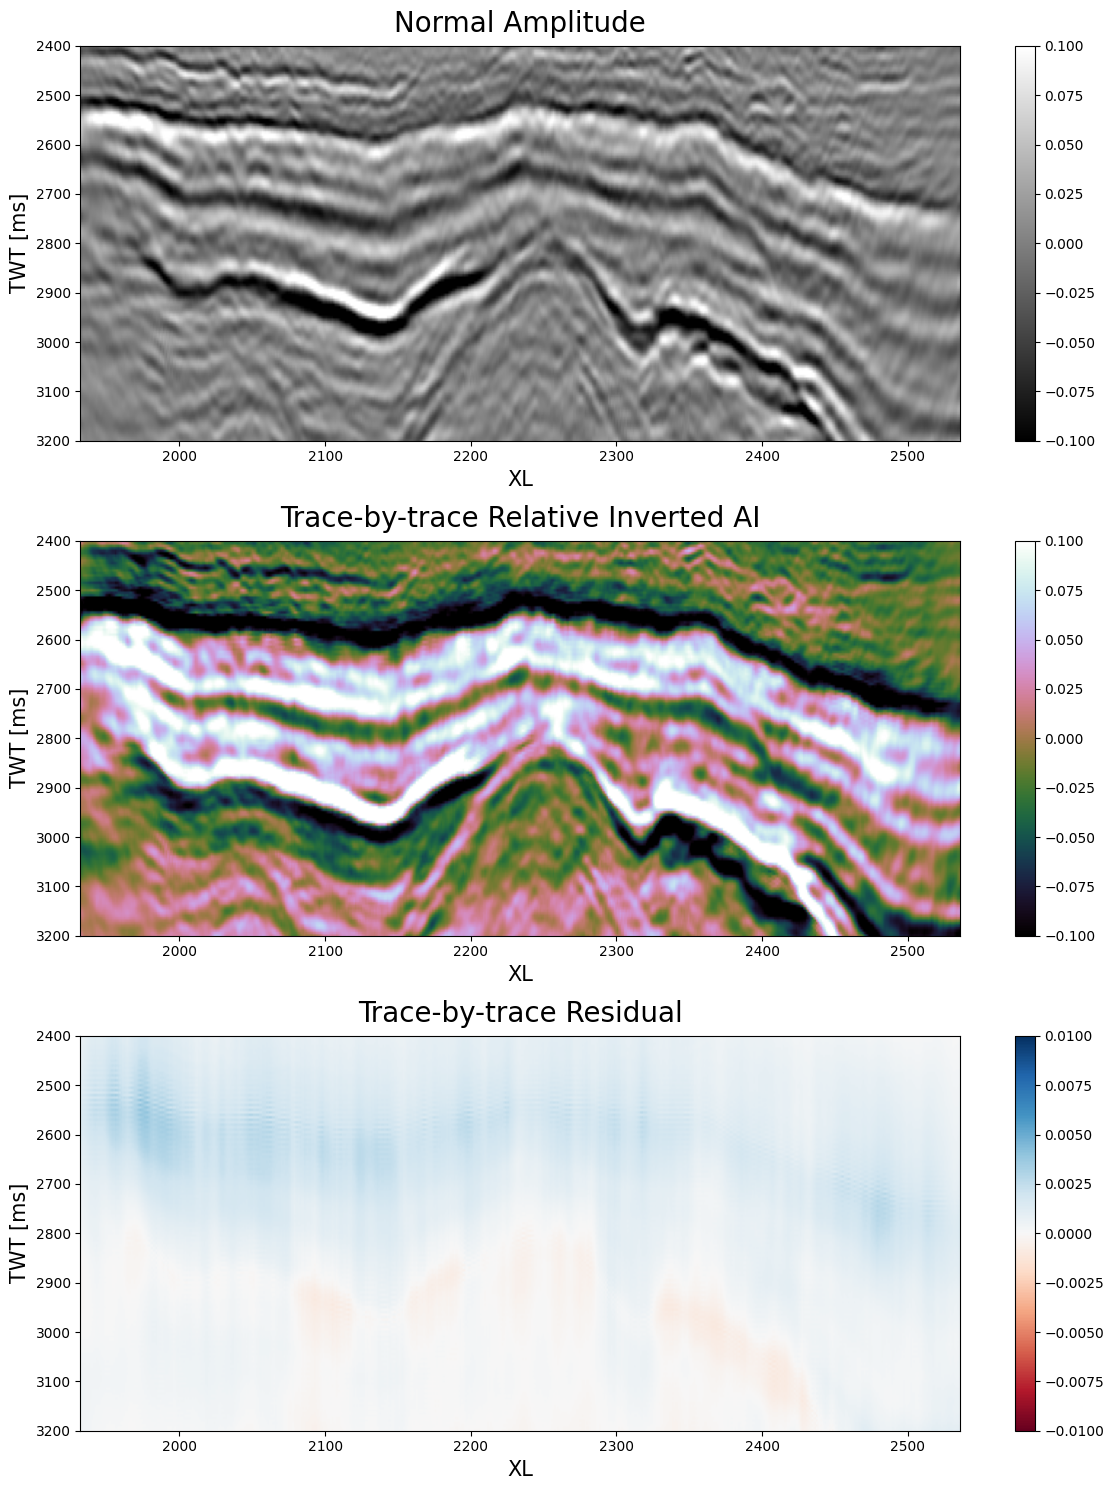

In [ ]:
# Plot result
plt.figure(figsize=(12,15))

plt.subplot(3,1,1)
plot2D(data.T, cube, 'il', cmap='gray', vmin=-.1, vmax=.1)
plt.title('Normal Amplitude', size=20, pad=10)
plt.xlabel('XL', size=15); plt.ylabel('TWT [ms]', size=15)
plt.ylim(3200,2400)

plt.subplot(3,1,2)
plot2D(m_rel, cube, 'il', cmap='cubehelix', vmin=-.1, vmax=.1)
plt.title('Trace-by-trace Relative Inverted AI', size=20, pad=10)
plt.xlabel('XL', size=15); plt.ylabel('TWT [ms]', size=15)
plt.ylim(3200,2400)

plt.subplot(3,1,3)
plot2D(r_rel, cube, 'il', cmap='RdBu', vmin=-.01, vmax=.01)
plt.title('Trace-by-trace Residual', size=20, pad=10)
plt.xlabel('XL', size=15); plt.ylabel('TWT [ms]', size=15)
plt.ylim(3200,2400)

plt.tight_layout()
plt.show()

## AVO modelling

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!git clone https://github.com/yohanesnuwara/geopysics

Cloning into 'geopysics'...
remote: Enumerating objects: 644, done.
remote: Counting objects: 100% (407/407), done.
remote: Compressing objects: 100% (199/199), done.
remote: Total 644 (delta 250), reused 347 (delta 206), pack-reused 237 (from 1)
Receiving objects: 100% (644/644), 49.87 MiB | 26.99 MiB/s, done.
Resolving deltas: 100% (371/371), done.


In [ ]:
import sys
sys.path.append('/content/geopysics/seismic')

from avotool import *
from seistool import *

In [ ]:
avo_df = pd.read_csv('/content/mahob2003_synthetic_data.csv')

avo_df

Layer           Name  Thickness    Vp    Vs   Rho    PR  Depth
0       1   Barrow Group       1000  3640  2000  2.45  0.33   1000
1       2        B (gas)        300  3530  2390  2.27  0.10   1300
2       3     shale/silt        200  3610  2040  2.42  0.30   1500
3       4        C (gas)        200  3625  2235  2.35  0.10   1700
4       5     shale/silt        200  3450  1900  2.30  0.31   1900
5       6      D (brine)        200  3915  2540  2.40  0.25   2100
6       7     shale/silt        200  3615  2025  2.49  0.30   2300
7       8  G (tight gas)        250  3985  2435  2.45  0.20   2550
8       9     shale/silt        175  3755  2020  2.47  0.30   2725
9      10     G1 (brine)        250  3830  2425  2.37  0.20   2975
10     11     shale/silt        200  3740  2125  2.45  0.30   3175
11     12        I (gas)        300  3550  2415  2.33  0.10   3475
12     13           silt        200  3960  2080  2.45  0.30   3675
13     14      L (brine)        200  4140  2555  2.43  0.20   3875
14     15     shale/silt        200  3995  2140  2.40  0.28   4075
15     16        M (gas)        300  3830  2540  2.33  0.10   4375
16     17     shale/silt        350  4320  2460  2.50  0.30   4725

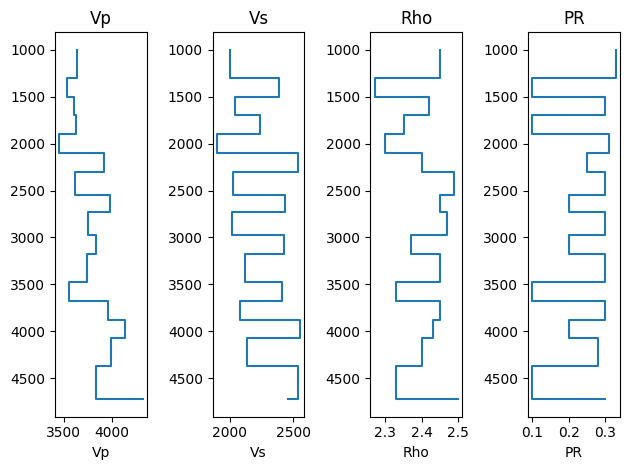

In [ ]:
cols = ['Vp', 'Vs', 'Rho', 'PR']

for i in range(len(cols)):
  plt.subplot(1,4,i+1)
  plt.step(avo_df[cols[i]], avo_df.Depth)
  plt.gca().invert_yaxis()
  plt.title(cols[i])
  plt.xlabel(cols[i])

plt.tight_layout()
plt.show()

Visualizing response of layer 1-2-3

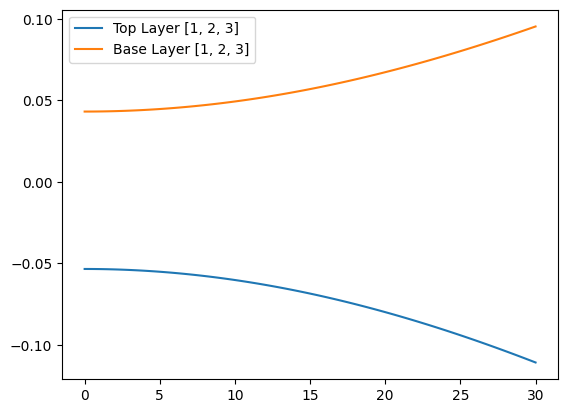

In [ ]:
layer = [1,2,3]

# row from dataframe is layer-1
row = [l-1 for l in layer]

Vp1, Vs1, rho1 = avo_df.iloc[row[0]]['Vp'], avo_df.iloc[row[0]]['Vs'], avo_df.iloc[row[0]]['Rho']
Vp2, Vs2, rho2 = avo_df.iloc[row[1]]['Vp'], avo_df.iloc[row[1]]['Vs'], avo_df.iloc[row[1]]['Rho']
Vp3, Vs3, rho3 = avo_df.iloc[row[2]]['Vp'], avo_df.iloc[row[2]]['Vs'], avo_df.iloc[row[2]]['Rho']

# define angle
theta = np.linspace(0, 30, 100)

# calculate intercept, A, B, C of first and second layer
R12, A12, B12, C12 = AkiRichards(Vp1, Vp2, Vs1, Vs2, rho1, rho2, theta)
R23, A23, B23, C23 = AkiRichards(Vp2, Vp3, Vs2, Vs3, rho2, rho3, theta)

plt.plot(theta, R12, label=f'Top Layer {layer}')
plt.plot(theta, R23, label=f'Base Layer {layer}')
plt.legend()

In [ ]:
# create ricker wavelet

t = np.linspace(-0.2,0.2,20)
w = Ricker(20, t)

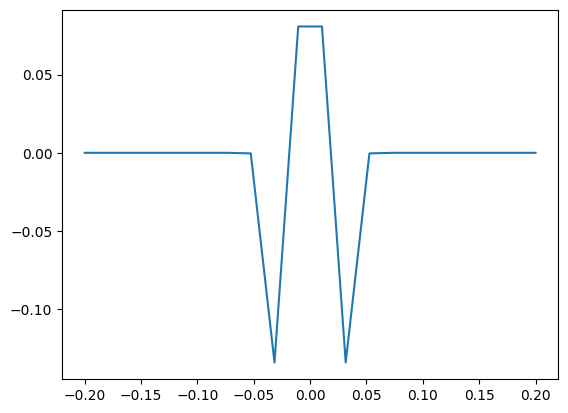

In [ ]:
plt.plot(t,w)

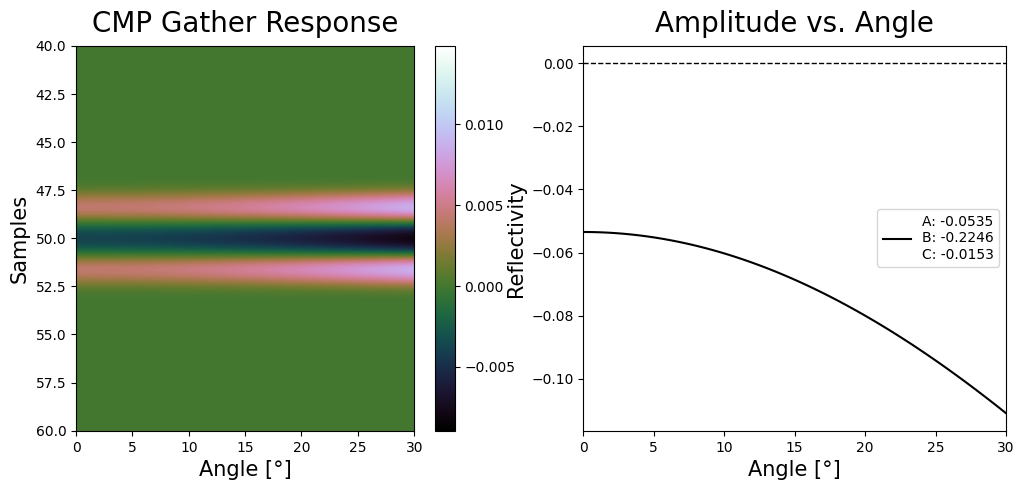

In [ ]:
plt.figure(figsize=(12,5))
modelAVO(Vp1, Vp2, Vs1, Vs2, rho1, rho2, w,
         interpolation='bicubic', loc='right')

plt.show()

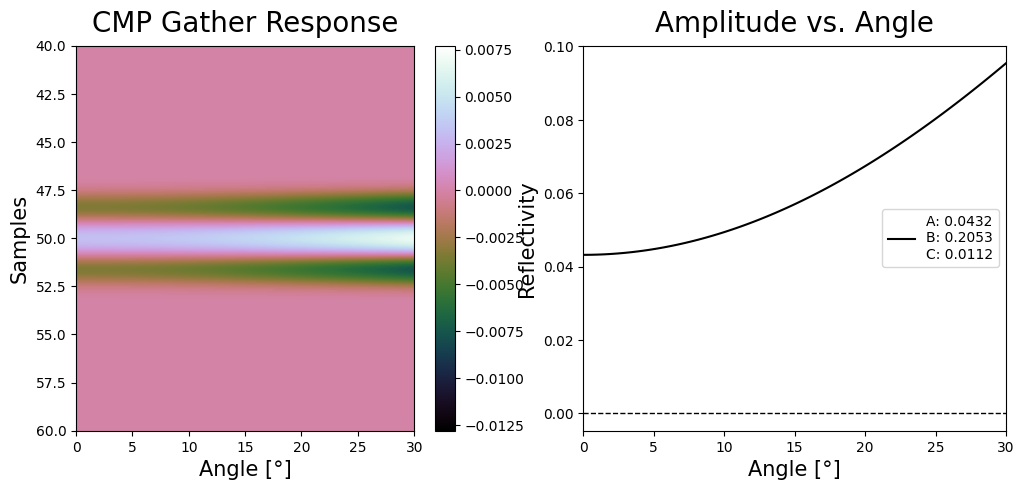

In [ ]:
plt.figure(figsize=(12,5))
modelAVO(Vp2, Vp3, Vs2, Vs3, rho2, rho3, w,
         interpolation='bicubic', loc='right')

plt.show()

### AVO geobody

In [ ]:
!unzip '/content/drive/MyDrive/EDVANTAGE/Python Geophysics Course/DATA/DAY 3/AVO/avo_a.zip'
!unzip '/content/drive/MyDrive/EDVANTAGE/Python Geophysics Course/DATA/DAY 3/AVO/avo_b.zip'

Archive:  /content/drive/MyDrive/EDVANTAGE/Python Geophysics Course/DATA/DAY 3/AVO/avo_a.zip
  inflating: avo_a.sgy               
Archive:  /content/drive/MyDrive/EDVANTAGE/Python Geophysics Course/DATA/DAY 3/AVO/avo_b.zip
  inflating: avo_b.sgy               


In [ ]:
avoA = openSegy3D('/content/avo_a.sgy', iline=181, xline=185)

Successfully read 

Inline range from 2750 to 3450
Crossline range from 9250 to 9500
TWT from 0.0 to 1000.0
Sample rate: 4.0 ms
Survey rotation: 0.02 deg


In [ ]:
avoB = openSegy3D('/content/avo_b.sgy', iline=181, xline=185)

Successfully read 

Inline range from 2750 to 3450
Crossline range from 9250 to 9500
TWT from 0.0 to 1000.0
Sample rate: 4.0 ms
Survey rotation: 0.02 deg


In [ ]:
# Add TWT with time lag 1800 ms
avoA.twt = avoA.twt + 1800
avoB.twt = avoB.twt + 1800

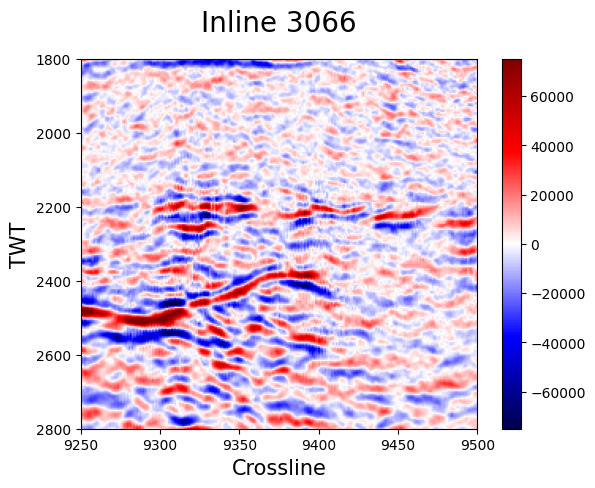

In [ ]:
sliceCube(avoA, 'il', inline_loc=3066, display=True,
          cmap='seismic', vmin=-7.5e4, vmax=7.5e4)

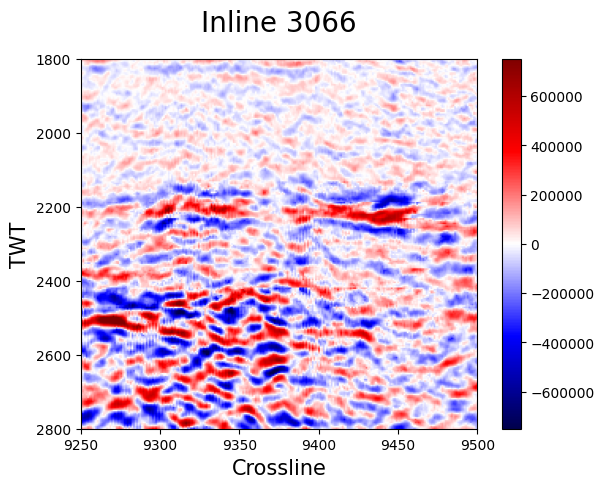

In [ ]:
sliceCube(avoB, 'il', inline_loc=3066, display=True,
          cmap='seismic', vmin=-.75e6, vmax=.75e6)

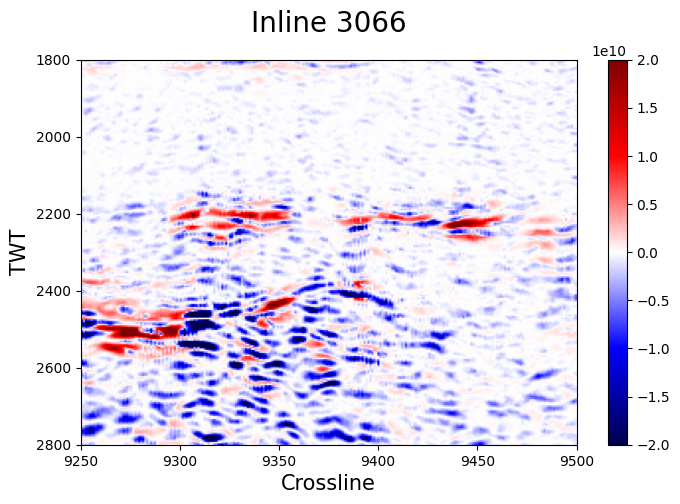

In [ ]:
# Calculate A*B product
avoAB = avoA.data * avoB.data

avoAB = cube_constructor(avoAB, avoA.inlines, avoA.crosslines, avoA.twt)

sliceCube(avoAB, 'il', inline_loc=3066, display=True,
          cmap='seismic', vmin=-2e10, vmax=2e10, figsize=(8,5))

In [ ]:
help(cube_constructor)

Help on function cube_constructor in module seistool:

cube_constructor(data, inlines, crosslines, twt)
    Convert seismic cube data to cube object
    
    INPUT:
    
    data: Cube data (3D array)
    inlines: List of inline numbers
    crosslines: List of crossline numbers
    twt: List of TWT
    NOTE: size of inlines, crosslines, twt must match shape of data
    
    OUTPUT:
    
    cube: Python object with attributes .data, .inlines, .crosslines, .twt



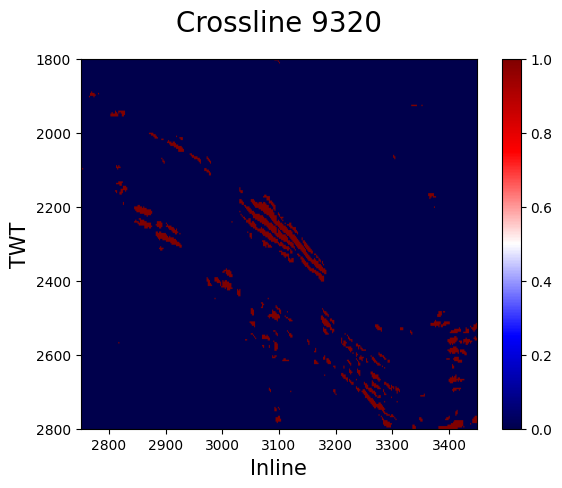

In [ ]:
p = avoAB.data.copy()
p[(p>3e9)] = 1
p[p!=1] = 0

p = cube_constructor(p, avoA.inlines, avoA.crosslines, avoA.twt)

# sliceCube(p, 'il', inline_loc=3066, display=True, cmap='seismic')
sliceCube(p, 'xl', xline_loc=9320, display=True, cmap='seismic')

In [ ]:
# Index to cut
id_il0, id_il1 = 11*11, 11*19
id_xl0, id_xl1 = 11*4, 11*17 # 11*4, 11*13
id_t0, id_t1 = 75, 125

# Cut locations
il0, il1 = avoA.inlines[id_il0], avoA.inlines[id_il1]
xl0, xl1 = avoA.crosslines[id_xl0], avoA.crosslines[id_xl1]
t0, t1 = avoA.twt[id_t0], avoA.twt[id_t1]

x = np.full(50, 3066)
y = np.full(50, 9380)
z = np.linspace(t0, t1, 50)

# Cut seismic data
data2 = avoAB.data.copy()
data2 = data2[id_il0:id_il1,id_xl0:id_xl1,id_t0:id_t1]

NameError: name 'avoA' is not defined

In [ ]:
from avotool import *

In [ ]:
def extract_geobody(cube, value, range_x, range_y, range_z,
                    figsize=(10,15), elev=90, azim=-90, title='Geobody'):
  """
  Extract geobody from an attribute cube

  INPUT:

  cube: Attribute cube object (3D array)
  value: Threshold value of attribute
  range_x: Min and max of x coordinate (Tuple)
  range_y: Min and max of y coordinate (Tuple)
  range_z: Min and max of z coordinate or TWT (Tuple)
  elev, azim: Viewing elevation and azimuth

  OUTPUT:

  Plot of extracted geobodies
  """
  data = cube.copy()
  cube[cube>value] = 1
  cube[cube!=1] = 0
  # cube = np.swapaxes(cube, 1, 0)
  nx, ny, nz = cube.shape
  cube = np.array(cube, dtype=bool)

  x = np.linspace(range_x[0], range_x[1], nx+1)
  y = np.linspace(range_y[0], range_y[1], ny+1)
  z = np.linspace(range_z[0], range_z[1], nz+1)
  x, y, z = np.meshgrid(y, x, z)

  colors = plt.cm.plasma(data)

  xw = np.full(50, 3066)
  yw = np.full(50, 9340)
  zw = np.linspace(t0, t1, 50)

  # def make_ax(grid=False):
  #   fig = plt.figure(figsize=figsize)
  #   ax = fig.gca(projection='3d')
  #   ax.set_title(title, pad=20)
  #   ax.set_xlabel("X", labelpad=20)
  #   ax.set_ylabel("Y", labelpad=20)
  #   ax.set_zlabel("TWT", labelpad=20)
  #   ax.grid(grid)
  #   ax.invert_zaxis()
  #   # ax.view_init(60,45)
  #   ax.view_init(elev, azim)
  #   return ax

  def make_ax(grid=False):
      fig = plt.figure(figsize=figsize)
      ax = fig.add_subplot(111, projection='3d')
      ax.set_title(title, pad=20)
      ax.set_xlabel("X", labelpad=20)
      ax.set_ylabel("Y", labelpad=20)
      ax.set_zlabel("TWT", labelpad=20)
      ax.grid(grid)
      ax.invert_zaxis()
      ax.view_init(elev, azim)
      return ax

  ax = make_ax(True)
  ax.voxels(x, y, z, cube, facecolor='lime', shade=False, edgecolors='k', linewidth=0.2)
  # ax.plot(yw, xw, zw, lw=10)
  plt.show()

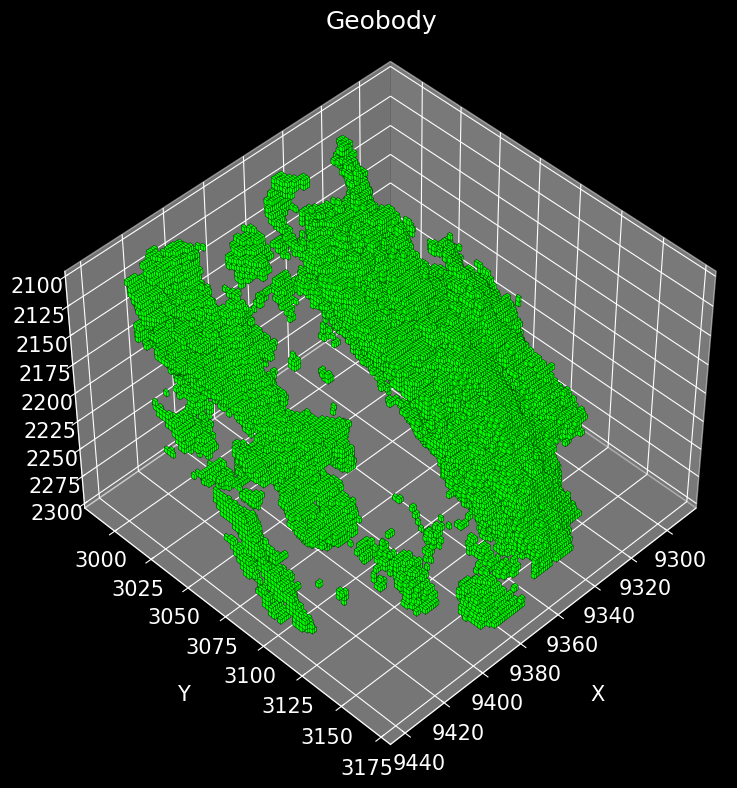

In [ ]:
# AVO A*B threshold
thres = 3e9

# Visualize geobodies
plt.rcParams['font.size'] = 15
plt.style.use('dark_background')

extract_geobody(data2, thres, (il0,il1), (xl0,xl1), (t0,t1),
                figsize=(15,9), azim=45, elev=45)